# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


### Sales Channel

In [9]:
per_internet =  df.sales_channel.value_counts().values[0] / df.sales_channel.count() * 100
per_mobile =  df.sales_channel.value_counts().values[1] / df.sales_channel.count() * 100

In [10]:
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through phone call: {per_mobile} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %


### Trip Type

In [11]:
df["trip_type"].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [12]:
per_round =  df.trip_type.value_counts().values[0] / df.trip_type.count() * 100
per_oneway =  df.trip_type.value_counts().values[1] / df.trip_type.count() * 100
per_circle = df.trip_type.value_counts().values[2] / df.trip_type.count() * 100

In [13]:
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


### Purchase Lead

C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='purchase_lead', ylabel='Count'>

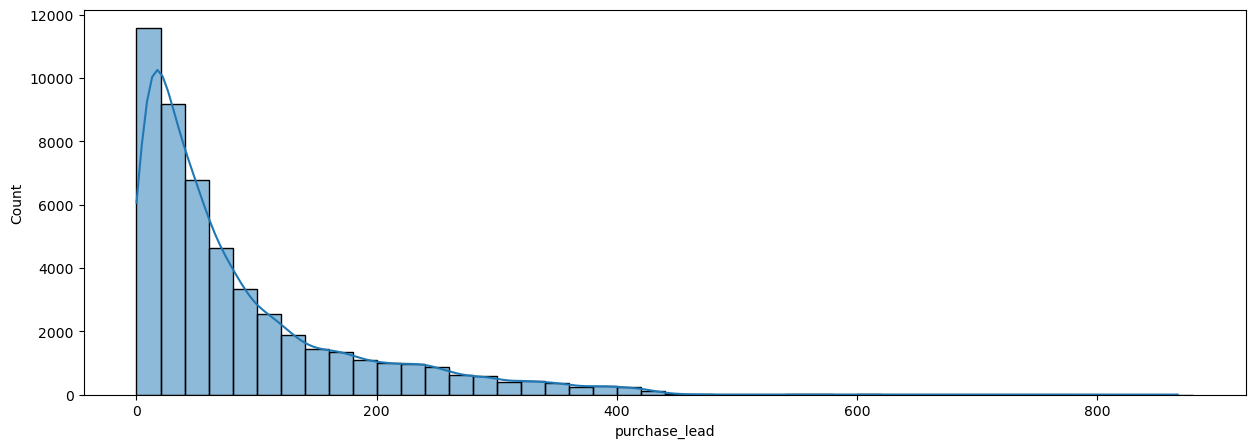

In [14]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

There are few bookings that were done more than 2 years before the travel date and it seems very unlikely that book that in advance. We will consider them as outliers which will effect the results of predictive model in a huge way.

In [15]:
(df.purchase_lead >550).value_counts()

purchase_lead
False    49986
True        14
Name: count, dtype: int64

If we assume that no customer is booking in advance of more than 1 and half year we will remove all entries with purchase_lead more than 550 days.

In [16]:
df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,7,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,3,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,2,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,6,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,5,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,4,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,5,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,1,KIXMLE,Japan,0,0,1,7.00,1


In [17]:
#filtering the data to have only purchase lead days less than 550 days
df = df[df.purchase_lead <550 ]

### Length of Stay

C:\Users\aswin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='length_of_stay', ylabel='Count'>

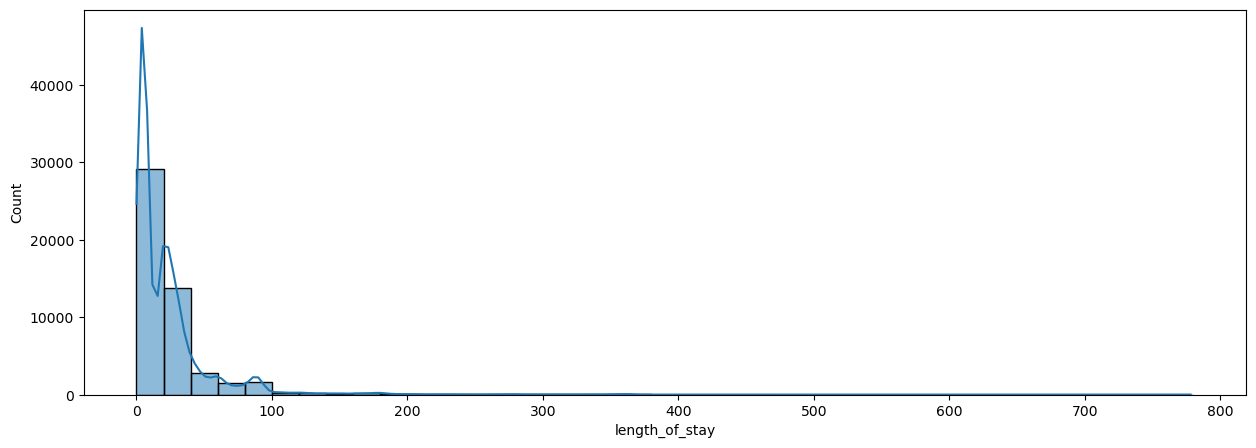

In [19]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=20,kde=True)

In [28]:
(df.length_of_stay>400).value_counts()

length_of_stay
False    49969
True        17
Name: count, dtype: int64

In [29]:
df[df.length_of_stay> 400].booking_complete.value_counts()

booking_complete
0    13
1     4
Name: count, dtype: int64

In [30]:
#filtering the data to have only length of stay days less than 400 days
df = df[df.purchase_lead <400 ]

### Flight Day

In [31]:
df.flight_day.value_counts()

flight_day
1    8002
3    7639
2    7613
4    7401
5    6741
7    6449
6    5754
Name: count, dtype: int64

### Booking Origin

In [55]:
df.booking_origin.value_counts()[:20]

booking_origin
Australia         17830
Malaysia           7107
South Korea        4501
Japan              3841
China              3369
Indonesia          2279
Taiwan             2072
Thailand           1990
India              1260
New Zealand        1063
Singapore          1040
United States       454
Vietnam             385
Macau               304
Hong Kong           293
Philippines         266
United Kingdom      173
Brunei              167
Cambodia            132
(not set)            84
Name: count, dtype: int64

Text(0, 0.5, 'Number of bookings')

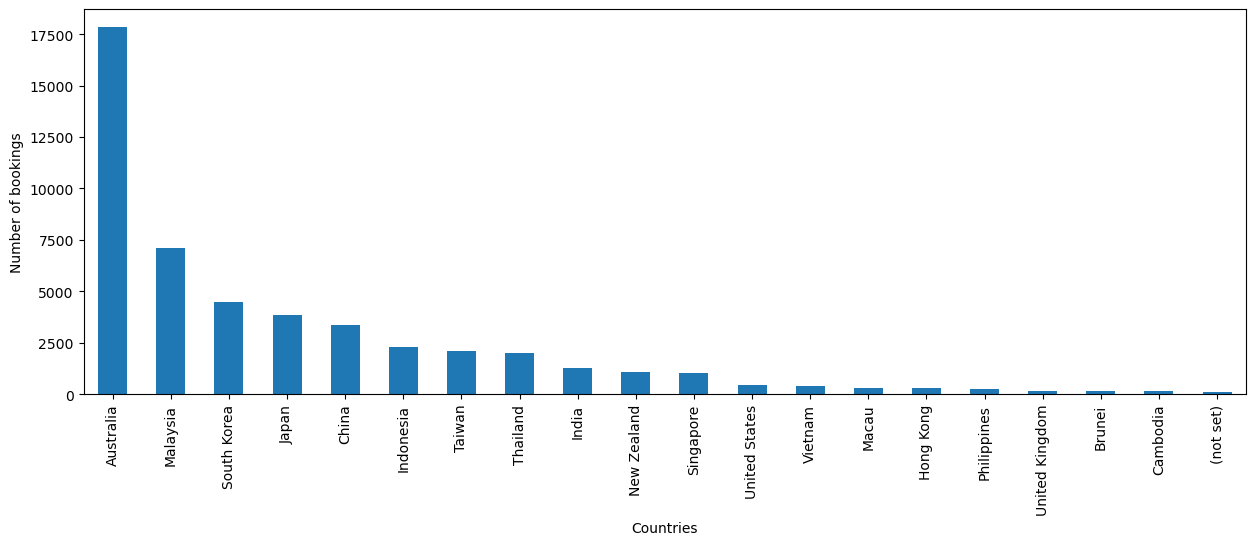

In [42]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Above chart shows travellers from which country had maximum booking applications.

Text(0, 0.5, 'Number of complete bookings')

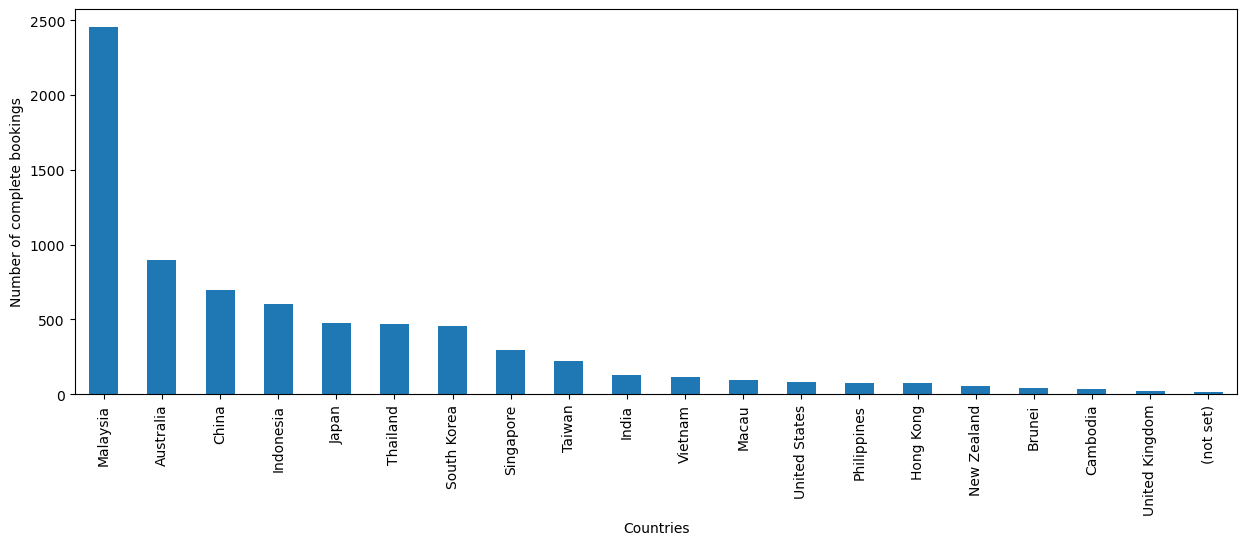

In [43]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

Above chart shows travellers from which country had their booking complete.

### Booking Complete

In [45]:
df.booking_complete.value_counts()

booking_complete
0    42169
1     7430
Name: count, dtype: int64

In [50]:
unsuccessful_booking_per = df.booking_complete.value_counts().values[0] / len(df) * 100

In [51]:
successful_booking_per = 100-unsuccessful_booking_per

In [52]:
print(f"Out of 50000 booking entries only {round(successful_booking_per,2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 14.98 % bookings were successfull or complete.


In [53]:
successful_booking_per

14.980140728643718

### Export the dataset to csv

In [56]:
df.to_csv("filtered_customer_booking.csv")